# Exploration of top-level clusters

This notebook contains intitial exploration of the top-level clusters forming Spatial Signatures in Great Britain.

The notebook looks at the overall similarity of clusters and picks the selection of representative characters to understand what each of the classes is composed of.

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg

from matplotlib.lines import Line2D

We need the original data in the same form as was used in the clustering.

In [2]:
%time standardized_form = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
%time stand_fn = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
%time data = dask.dataframe.multi.concat([standardized_form, stand_fn], axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()

CPU times: user 38.1 s, sys: 32.9 s, total: 1min 11s
Wall time: 1min 44s
CPU times: user 76.8 ms, sys: 461 ms, total: 537 ms
Wall time: 598 ms
CPU times: user 45 ms, sys: 4.3 ms, total: 49.4 ms
Wall time: 43.7 ms
CPU times: user 18.5 ms, sys: 0 ns, total: 18.5 ms
Wall time: 18.4 ms
CPU times: user 2min 40s, sys: 1min 27s, total: 4min 7s
Wall time: 2min 44s


And labels indicating the final cluster for each enclosed tessellation cell.

In [3]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/KMeans10GB.pq")

## Overall similarity

Similarity of clusters can be represented by hierarchical dendrogram generated using Ward's agglomerative clustering.

In [4]:
from scipy.cluster import hierarchy

We use cluster centroids (mean value) for the characterisation.

In [6]:
group = data.groupby(labels['kmeans10gb'].values).mean()  # cluster centroids

Now we can create hierarchical classification based on cluster centers.

In [7]:
Z = hierarchy.linkage(group, 'ward')

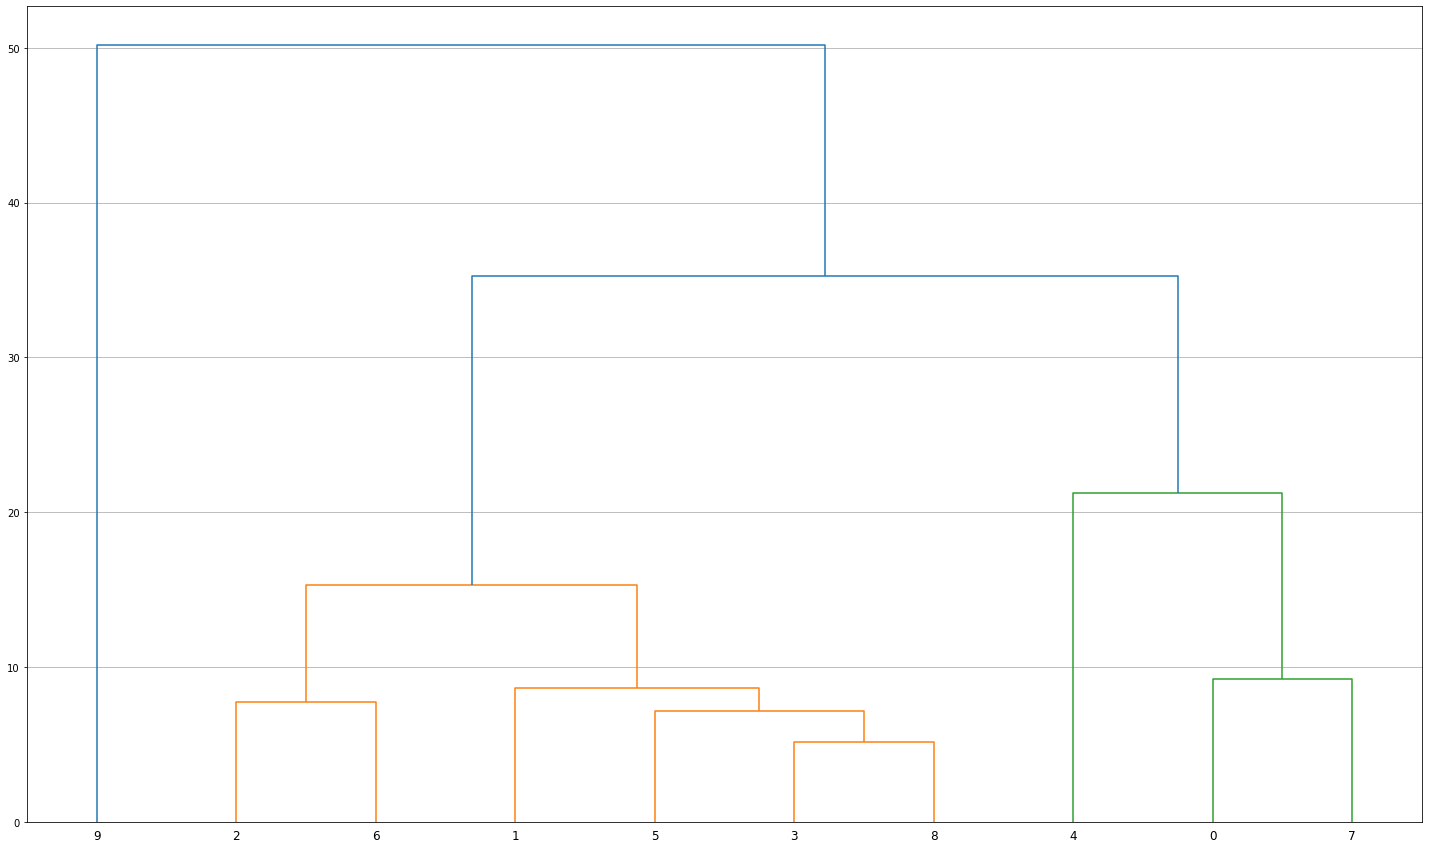

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 15))
dn = hierarchy.dendrogram(Z, labels=group.index)
plt.grid(True, axis='y', which='both')

The diagram in the cell above shows that the most dissimilar cluster is the 9 (city centers). The branch on the very right (4, 0, 7) contains predominantly countryside-based signatures. Clusters 2 and 6 form the main bulk of low density development, while the remaining classes (1, 5, 3, 8) cover various industrial, peripheral and fringe locations in cities.

In [9]:
labels['kmeans10gb'].value_counts()

7    3686554
0    3022385
3    2561211
1    1962830
2    1115564
5     707211
4     595902
8     564318
6     209959
9     113644
Name: kmeans10gb, dtype: int64

Classification is relatively balanced with no outlier class in terms of number of observations.

## Characterisation

In the section below, we look at some of the characters used within the clustering to characterise the individual categories for a better understandning how they differ.

Let's see which columns are available.

In [16]:
group.columns.values

array(['sdbAre_q1', 'sdbAre_q2', 'sdbAre_q3', 'sdbPer_q1', 'sdbPer_q2',
       'sdbPer_q3', 'sdbCoA_q1', 'sdbCoA_q2', 'sdbCoA_q3', 'ssbCCo_q1',
       'ssbCCo_q2', 'ssbCCo_q3', 'ssbCor_q1', 'ssbCor_q2', 'ssbCor_q3',
       'ssbSqu_q1', 'ssbSqu_q2', 'ssbSqu_q3', 'ssbERI_q1', 'ssbERI_q2',
       'ssbERI_q3', 'ssbElo_q1', 'ssbElo_q2', 'ssbElo_q3', 'ssbCCM_q1',
       'ssbCCM_q2', 'ssbCCM_q3', 'ssbCCD_q1', 'ssbCCD_q2', 'ssbCCD_q3',
       'stbOri_q1', 'stbOri_q2', 'stbOri_q3', 'sdcLAL_q1', 'sdcLAL_q2',
       'sdcLAL_q3', 'sdcAre_q1', 'sdcAre_q2', 'sdcAre_q3', 'sscCCo_q1',
       'sscCCo_q2', 'sscCCo_q3', 'sscERI_q1', 'sscERI_q2', 'sscERI_q3',
       'stcOri_q1', 'stcOri_q2', 'stcOri_q3', 'sicCAR_q1', 'sicCAR_q2',
       'sicCAR_q3', 'stbCeA_q1', 'stbCeA_q2', 'stbCeA_q3', 'mtbAli_q1',
       'mtbAli_q2', 'mtbAli_q3', 'mtbNDi_q1', 'mtbNDi_q2', 'mtbNDi_q3',
       'mtcWNe_q1', 'mtcWNe_q2', 'mtcWNe_q3', 'mdcAre_q1', 'mdcAre_q2',
       'mdcAre_q3', 'ltcWRE_q1', 'ltcWRE_q2', 'ltcWRE_q3', 'ltbI

For the first pass, we can pick a few of the easy-to-interpret characters. When we have more options (q1, q2, q3) it is the best to pick the q2, which is a weighted median.

We start with the covered area ratio (`sicCAR_q2`) as a straigtforward density measure, population (`population_q2`), NDVI (`mean_q2`), counts of supermarkets (`supermarkets_counts`) and food venues (`fhrs_counts`), and meshedness as an indicator of grid-like street networks (`lcdMes_q2`).

In [13]:
sel = group[["sicCAR_q2", "population_q2", "mean_q2", "supermarkets_counts", "fhrs_counts", "lcdMes_q2"]]

We rescale the data for easier interpretation of diagrams.

In [87]:
sel = (sel-sel.min())/(sel.max()-sel.min()) 
sel

,sicCAR_q2,population_q2,mean_q2,supermarkets_counts,fhrs_counts,lcdMes_q2
0,0.105075,0.029833,0.805844,0.007099,0.004606,0.136498
1,0.697741,0.194768,0.329771,0.219868,0.122080,0.430553
2,0.770038,0.376868,0.187102,0.388398,0.374039,0.714183
3,0.633622,0.182823,0.349317,0.170066,0.089433,0.124967
4,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5,0.566827,0.224437,0.339287,0.165275,0.096466,0.389650
6,0.804478,0.262524,0.147033,0.399420,0.424760,1.000000
7,0.412595,0.102122,0.542382,0.073892,0.040357,0.096293
8,0.673634,0.271770,0.339527,0.240730,0.125166,0.028512
9,1.000000,1.000000,0.000000,1.000000,1.000000,0.840747


Columns may have cryptic names, so we use custom labels.

In [127]:
labels = ["built-up density", "population", "NDVI", "supermarkets", "FHRS", "meshedness"]

In [83]:
cmap = ugg.get_colormap(10, randomize=True)

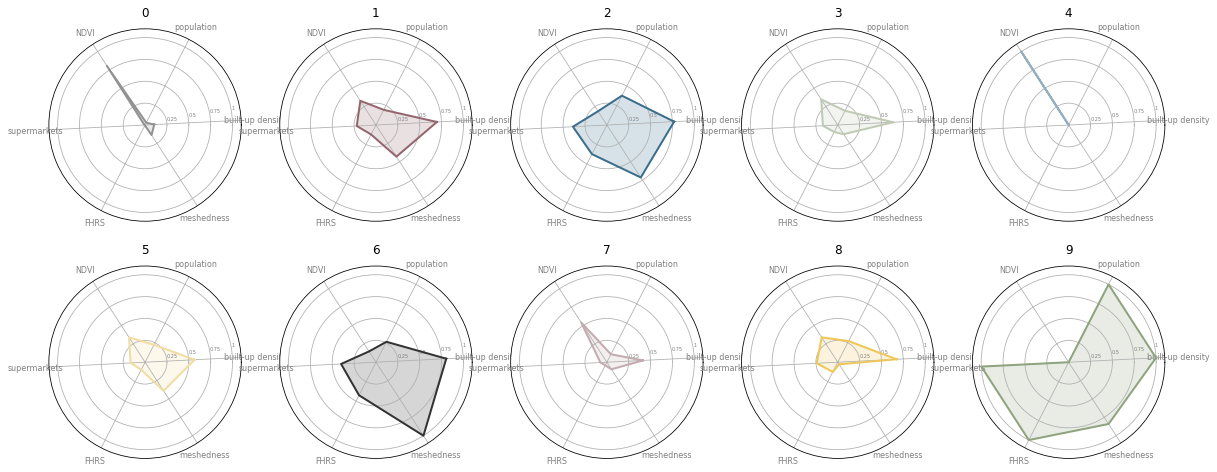

In [128]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='grey', size=8)
    ax.set_ylim(0, 1.1)
    ax.set_yticks([.25, .5, .75, 1])
    ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
    ax.set_rlabel_position(10)
    ax.set_title(i)
    
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.2, color=cmap.colors[i])

fig.set_facecolor('white')

In the figure above, each score of the selected characters for each cluster is shown as a spider diagram.

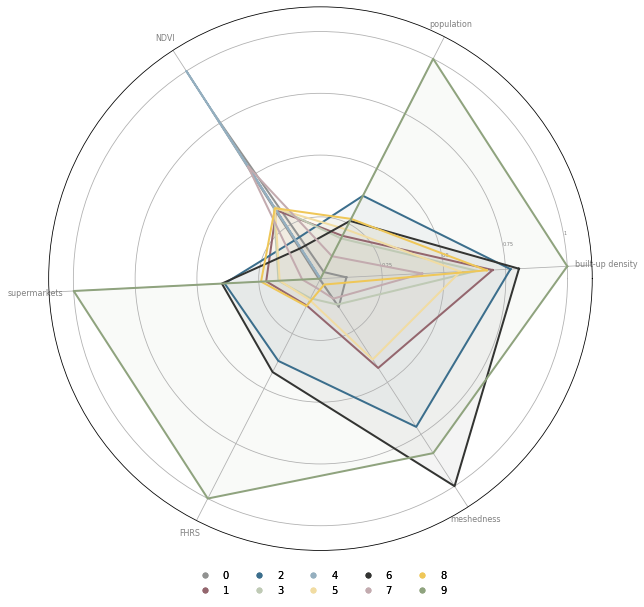

In [129]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []


for i in range(10):
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[i])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[i]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, range(10), loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

We can also overlap all clusters in the same diagram for a direct comparison.

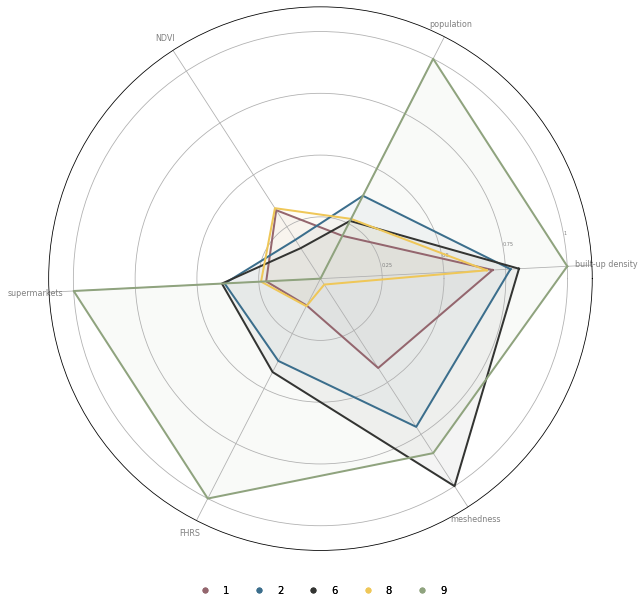

In [130]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []

opts = [1, 2, 6, 8, 9]

for i in opts:
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[i])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[i]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, opts, loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

Or we can plot only the subset of clusters (urban classes here) if we want to see the differences between those.

Cluster 2 and 6 are quite similar, let's check which characters are the most different:

In [125]:
(group.loc[2] - group.loc[6]).abs().sort_values()[-40:]

F. Construction_q3                      0.649119
ssbCCo_q1                               0.650907
linWID_q2                               0.656576
sdbPer_q3                               0.682242
F. Construction_q2                      0.723104
sdsSWD_q3                               0.728287
population_q3                           0.739577
population_q2                           0.749769
H, J. Transport and communication_q1    0.752492
ssbElo_q3                               0.771562
xcnSCl_q3                               0.777102
ssbCCM_q3                               0.777249
sdbAre_q2                               0.784049
ssbElo_q2                               0.796450
sdbAre_q1                               0.800752
lcdMes_q1                               0.801982
lcdMes_q3                               0.818693
lcdMes_q2                               0.838077
night_lights_q1                         0.868450
sdbPer_q1                               0.889522
night_lights_q2     

The significant difference is in the street network patterns of both clusters. Cluster 6 is more connected, having a stronger grid-like pattern as shown in local closeness, proportion og 4-way intersections or meshedness. At the same time, it is less dense than cluster 2.

In [126]:
group["population_q2"]

0   -0.804873
1    0.276628
2    1.470679
3    0.198304
4   -1.000495
5    0.471169
6    0.720910
7   -0.330870
8    0.781538
9    5.556644
Name: population_q2, dtype: float64

We can also check workplace population by a type of industry.

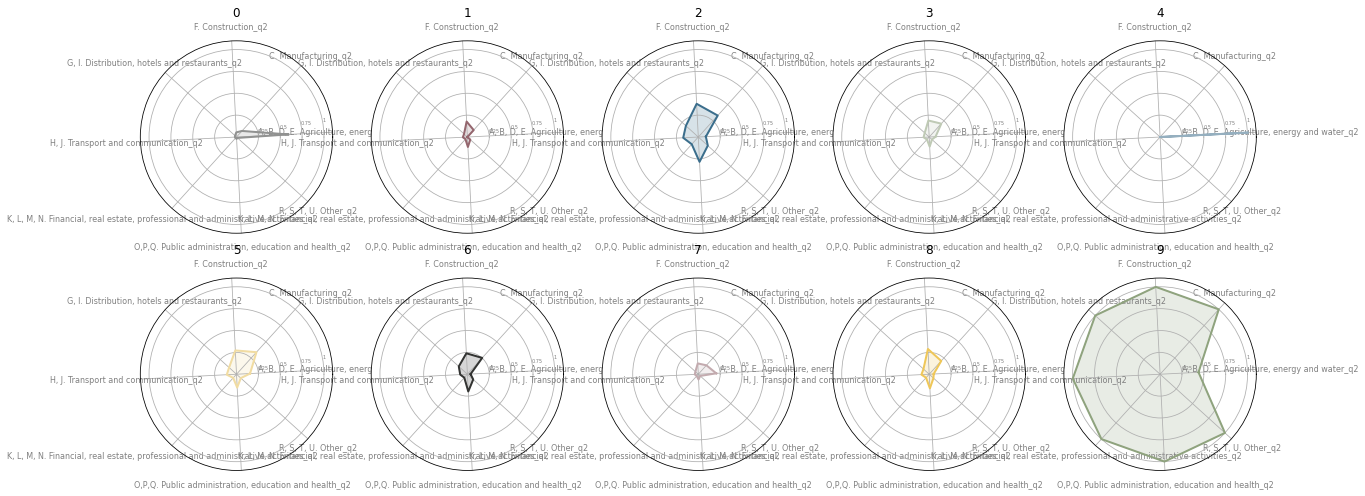

In [131]:
selection = ['A, B, D, E. Agriculture, energy and water_q2',
            'C. Manufacturing_q2',
            'F. Construction_q2',
            'G, I. Distribution, hotels and restaurants_q2',
            'H, J. Transport and communication_q2',
            'K, L, M, N. Financial, real estate, professional and administrative activities_q2',
            'O,P,Q. Public administration, education and health_q2',
            'R, S, T, U. Other_q2',
            ]
labels = selection

sel = group[selection]
sel = (sel-sel.min())/(sel.max()-sel.min()) 

fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

for i, ax in enumerate(axs.flatten()):
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='grey', size=8)
    ax.set_ylim(0, 1.1)
    ax.set_yticks([.25, .5, .75, 1])
    ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
    ax.set_rlabel_position(10)
    ax.set_title(i)
    
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.2, color=cmap.colors[i])

fig.set_facecolor('white')

As expected, the majority of jobs is in cluster 9 (city centres), with the excepction of agriculture dominant in clusters 4 and 0.

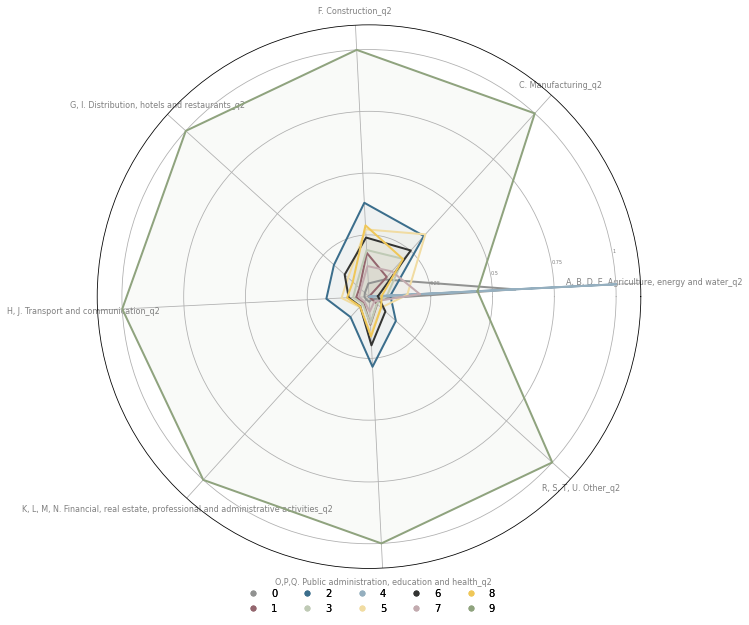

In [132]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []


for i in range(10):
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[i])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[i]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, range(10), loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

The same data can be also plotted in an ovelapping manner for easier comparison.

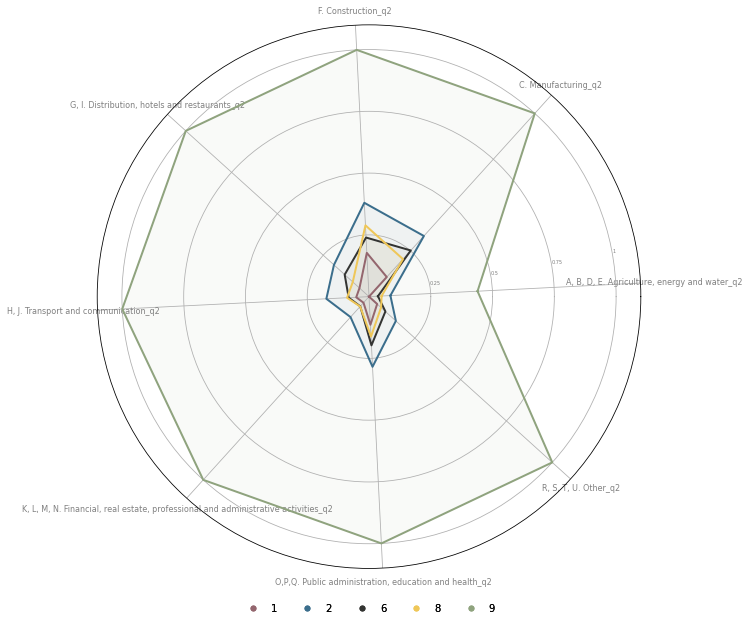

In [133]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

N = len(sel.columns)
angles = [(n / float(N) * 2 * np.pi)  + .05 for n in range(N)]
angles += angles[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='grey', size=8)
ax.set_ylim(0, 1.1)
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels([.25, .5, .75, 1], color='grey', size=5)
ax.set_rlabel_position(10)
custom_points = []

opts = [1, 2, 6, 8, 9]

for i in opts:
    values = sel.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=cmap.colors[i])
    ax.fill(angles, values, 'b', alpha=0.05, color=cmap.colors[i])
    
    custom_points.append(Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=cmap.colors[i]))

fig.set_facecolor('white')
leg_points = ax.legend(custom_points, opts, loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.5, -0.1))
ax.add_artist(leg_points)

## Geographical distribution

We can also check the geographical distribution of clusters.

In [3]:
spsig = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_KMeans10_GB_simplified.pq")

In [7]:
cmap = ugg.get_colormap(10, randomize=True)

In [ ]:
token = "pk.eyJ1IjoibWFydGluZmxlaXMiLCJhIjoiY2tsNmhlemtxMmlicTJubXN6and5aTc2NCJ9.l7nSUXM7ZRjAWTB7oXiswQ"

ax = spsig.plot("kmeans10gb", ax=axs['A'], zorder=1, linewidth=0, edgecolor='w', alpha=1, legend=True, cmap=cmap, categorical=True)
# ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
# ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
# ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

# plt.savefig(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_KMeans10_GB.png")

In [10]:
centroid = spsig.centroid
x = centroid.x
y = centroid.y

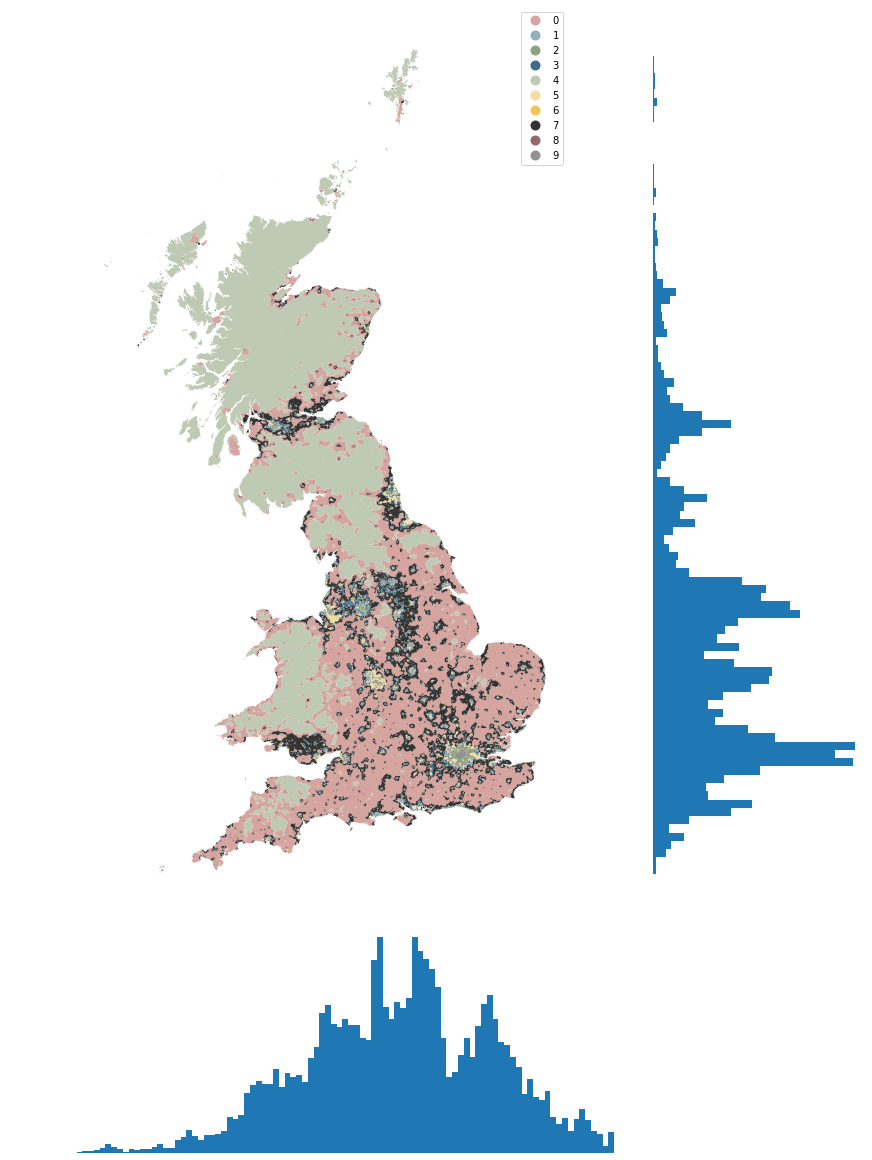

In [23]:
f = plt.figure(
    constrained_layout=True, figsize=(12, 16)
)
axs = f.subplot_mosaic(
    """
    AAAB
    AAAB
    AAAB
    AAAB
    CCCD
    """,
)

spsig.plot("kmeans10gb", ax=axs['A'], zorder=1, linewidth=0, edgecolor='w', alpha=1, legend=True, cmap=cmap, categorical=True)
x.plot.hist(bins=100, ax=axs["C"])
y.plot.hist(bins=100, orientation="horizontal", ax=axs["B"])
for ax in axs.values():
    ax.set_axis_off()

<AxesSubplot:ylabel='Frequency'>

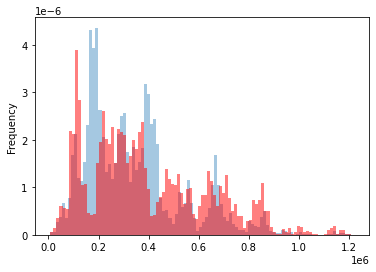

In [66]:
ax = y.plot.hist(bins=100, density=True, alpha=.4)
y[spsig.kmeans10gb == 4].plot.hist(bins=100, ax=ax, color='r', alpha=.5, density=True)

In [68]:
spsig.kmeans10gb.value_counts()

3    17357
1    10919
0    10882
5    10675
7    10636
8     9418
2     7214
4     6214
6     2561
9     1655
Name: kmeans10gb, dtype: int64

In [ ]:
# population by class
# calinski-harabazs per variable
# random forest and feature importance

## Summary

### Countryside

Clusters 0, 4, and 7 can be classified as countryside.

**Cluster 0**

Cluster 0 is located predominantly in England and is can be characterised as agriculture-dominated countryside. It contains both pastures and fields.

**Cluster 4**

Cluster 4 is the most natural of all, covering national parks and large areas of inhabited land like Scottish Highlands, Lake District or the majority of Wales.

**Cluster 7**

Cluster 7 can be characterised as a green belt around cities. It covers mostly agricultural land in the immediate adjacency of towns and cities, often including development on their edges.

### Urban areas

The remaining classes can be classified as urban or semi-urban areas.

#### Periphery

**Cluster 3**

Cluster 3 is a transition between countryisde and urbanised land. It is located on the outskirts of cities and has typically a large open space area intertwined with different kinds of development from highways to smaller neighbourhoods. If we wanted to call an urban periphery, it would be cluster 3.

#### Suburbs

Clusters 1 and 8 can be described as suburban neighbourhoods. Both are on the edges of cities, both have relative lack of jobs and destinations.

**Cluster 1**

The main difference between them is in street networks. Cluster 1 tends to have more connected networks, even though both lack connectivty compared to some other clusters.

**Cluster 8**

Cluster 8 contains suburban neighbourhoods with the least connected networks.

#### Cities

Cluster 2 and 6 cover the majority of residential urban development, whilst cluster 9 represents dense city centers.

**Cluster 2**

In cluster 2 are residential neighbourhoods with some services and jobs. It is a relatively dense development, often terraced housing and other similar kinds. It is the most abundant urban cluster.

**Cluster 6**

Cluster 6 is very similar to the cluster 2. The main difference lies in street networks, where cluster 6 tends to have more connected grid-like patterns. However, it has less jobs than cluster 2.

**Cluster 9**

Cluster 9 is the dense development of city centres with an abundance of jobs and services.

**Cluster 5**

Finally, cluster 5 covers industrial areas in cities.

## Random Forest